In [1]:
import numpy as np
from mat import *
import matplotlib.pyplot as plt

[[-4  1  1  1  0  0  1  0  0]
 [ 1 -4  1  0  1  0  0  1  0]
 [ 1  1 -4  0  0  1  0  0  1]
 [ 1  0  0 -4  1  1  1  0  0]
 [ 0  1  0  1 -4  1  0  1  0]
 [ 0  0  1  1  1 -4  0  0  1]
 [ 1  0  0  1  0  0 -4  1  1]
 [ 0  1  0  0  1  0  1 -4  1]
 [ 0  0  1  0  0  1  1  1 -4]]
[[[[-4  1  1]
   [ 1  0  0]
   [ 1  0  0]]

  [[ 1 -4  1]
   [ 0  1  0]
   [ 0  1  0]]

  [[ 1  1 -4]
   [ 0  0  1]
   [ 0  0  1]]]


 [[[ 1  0  0]
   [-4  1  1]
   [ 1  0  0]]

  [[ 0  1  0]
   [ 1 -4  1]
   [ 0  1  0]]

  [[ 0  0  1]
   [ 1  1 -4]
   [ 0  0  1]]]


 [[[ 1  0  0]
   [ 1  0  0]
   [-4  1  1]]

  [[ 0  1  0]
   [ 0  1  0]
   [ 1 -4  1]]

  [[ 0  0  1]
   [ 0  0  1]
   [ 1  1 -4]]]]
[nan 0.  inf 0.  inf 0.5 inf 0.5 inf]


d:\python\matrices_labs\lab_3\mat.py:548: RuntimeWarning: divide by zero encountered in divide
  print(abs((x_appr - x_true) / x_true))
d:\python\matrices_labs\lab_3\mat.py:548: RuntimeWarning: invalid value encountered in divide
  print(abs((x_appr - x_true) / x_true))


## Задания

1. Убедитесь, что матрица $A$ является (1) блочной матрицей Теплица, (2) блочной ленточной матрицей, (3) симметрической
матрицей, (4) неположительно определенной матрицей. Какие алгоритмы можно использовать для специальных матриц такого вида?

2. Реализуйте алгоритм Левинсона для блочных матриц (можно воспользоваться классами для блочных матриц из прошлой лабораторной). Как можно усовершенствовать алгоритм для ленточных матриц и для симметрических матриц? Решите уравнение Пуассона решателем линейных систем с блочными ленточными симметрическими матрицами Теплица. В качестве правой части системы возьмите $f(x,y)=\cos \pi x\cos \pi y$. Оцените точность решения.
Оцените сложность полученного алгоритма по времени.

### 1

In [2]:
y = np.array([4., 4., 4., 4., 6.])
vals = np.array([1., 5., 3., 9., 10.])
A = ToeplitzMatrix(vals)
print('A:')
print(A)
x = A.levinson(y)
print('y: ')
print(y)

print('after levinson:')
print(A.data_mat().dot(x))

A:
1.0 5.0 3.0 9.0 10.0
5.0 1.0 5.0 3.0 9.0
3.0 5.0 1.0 5.0 3.0
9.0 3.0 5.0 1.0 5.0
10.0 9.0 3.0 5.0 1.0
y: 
[4. 4. 4. 4. 6.]
after levinson:
[4. 4. 4. 4. 6.]


Работает!!!

Теперь уравнение Пуассона, зададим систему

In [3]:
def D(n=4):
    mat = Laplace2D(n=n).m

    return ToeplitzMatrix(mat[0, :])

f = lambda x, y: np.cos(np.pi * x) * np.cos(np.pi * y)

def y_n_x(n=4):
    points = np.linspace(-1, 1, n)
    x = np.ravel([[f(x, y) for x in points] for y in points])
    x -= np.sum(x)
    d = D(n=n).data_mat()
    y = d.dot(x.T)
    return y, x


Text(0.5, 1.0, 'Относительная ошибка решения в каждой точке')

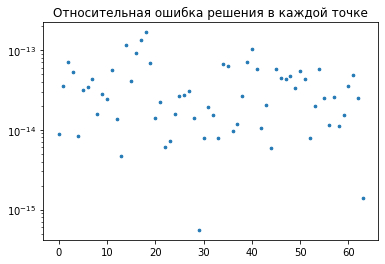

In [4]:
n = 8

d = D(n)
y_right, x = y_n_x(n)

res = d.levinson(y_right)

plt.scatter(np.arange(n**2), np.abs((res - x)), s = 7)
plt.yscale('log')
plt.title('Относительная ошибка решения в каждой точке')

## Фурье

In [34]:
N = 30
laplace = Laplace2D(N)
laplace_ = laplace.m.reshape((N, N, N, N))
F_laplace  = np.fft.ifft2(np.fft.fft2(laplace_, axes=[0, 1]), axes=[2, 3])

In [46]:
f = lambda x, y: np.cos(np.pi * x) * np.cos(np.pi * y)

In [47]:
vals = np.linspace(-1, 1, N)
x_true = np.array([[f(x, y) for x in vals] for y in vals])
x_true -= np.sum(x_true)
y = laplace.m.dot(np.ravel(x_true).T)
F_y = np.fft.fft2(y_right.reshape((N, N)))
diagonal = np.array([F_laplace.reshape((N**2, N**2))[i, i] for i in range(N**2)])
F_x = np.ravel(F_y) / diagonal
F_x[0] = 0

<ipython-input-47-8a9c8c6e3d4a>:7: RuntimeWarning: divide by zero encountered in divide
  F_x = np.ravel(F_y) / diagonal
<ipython-input-47-8a9c8c6e3d4a>:7: RuntimeWarning: invalid value encountered in divide
  F_x = np.ravel(F_y) / diagonal


No handles with labels found to put in legend.


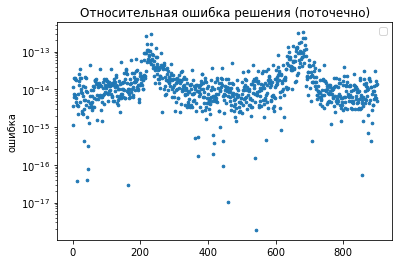

In [48]:
plt.scatter(range(N**2), np.abs((laplace.m.dot(np.fft.ifft2((F_x.reshape((N, N)))).reshape((N**2,)).T) - y_right) / y_right), s = 7)
plt.yscale('log')
plt.title('Относительная ошибка решения (поточечно)')
plt.ylabel('ошибка')
plt.legend()